In [2]:
import os 
import numpy as np
import pandas as pd
from numpy import ndarray
from nsddatapaper_rsa.utils.nsd_get_data import get_conditions, get_labels
from nsddatapaper_rsa.utils.utils import category_dict, mds
from utils.utils import *
from utils.kabsch2D import *
from nsd_access import NSDAccess 
from matplotlib import cm 
import scprep
import matplotlib.pyplot as plt
from sklearn import manifold
from scipy.spatial.distance import squareform

In [3]:
RDM = np.load(os.path.join(data_dir, 'RDM' ,'betas_split' , 'subj01_37_V1_fullrdm_correlation_betas_train.npy'), allow_pickle=False)
RDM.shape

(48417720,)

In [4]:
RDM_full_cor = np.load(os.path.join(proj_dir, 'rsa', 'subj02_37_V1_fullrdm_correlation.npy'))
RDM_full_cor.shape

(385017375,)

/home/stan/miniconda3/envs/thesis/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
np.save('

In [4]:
#MDS_V1 = mds(RDM, n_jobs=2)
#MDS_V1

In [11]:
#np.save('MDS_V1.npy', MDS_V1)
MDS_V1 = np.load('MDS_V1.npy', allow_pickle=True)
MDS_V1.shape

(9841, 2)

In [5]:
labels = np.load('/home/stan/thesis-repo/projects/NSD/rsa/all_stims_category_labels.npy', allow_pickle=True)
n_sessions = 37
n_subjects = 8
subject = 0
roi = "v1" 

flat_labels = [item for sublist in labels for item in sublist]
all_labels = sorted(list(set(flat_labels)))

category_colors = cm.RdYlBu(range(80))

sub = 'subj01'

conditions = get_conditions(nsd_dir, sub, n_sessions)
conditions = np.asarray(conditions).ravel()

		sub: subj01 fetching condition trials in session: 1
		sub: subj01 fetching condition trials in session: 2
		sub: subj01 fetching condition trials in session: 3
		sub: subj01 fetching condition trials in session: 4
		sub: subj01 fetching condition trials in session: 5
		sub: subj01 fetching condition trials in session: 6
		sub: subj01 fetching condition trials in session: 7
		sub: subj01 fetching condition trials in session: 8
		sub: subj01 fetching condition trials in session: 9
		sub: subj01 fetching condition trials in session: 10
		sub: subj01 fetching condition trials in session: 11
		sub: subj01 fetching condition trials in session: 12
		sub: subj01 fetching condition trials in session: 13
		sub: subj01 fetching condition trials in session: 14
		sub: subj01 fetching condition trials in session: 15
		sub: subj01 fetching condition trials in session: 16
		sub: subj01 fetching condition trials in session: 17
		sub: subj01 fetching condition trials in session: 18
		sub: subj01 fetch

In [6]:

sample, sample_idx = np.unique(conditions, return_index=True)
categories_sampled = labels[sample_idx]

In [7]:
category_matrix = get_labels(sub, betas_dir, nsd_dir, sample, labels, categories_sampled)

loading serialised label matrix from:
	 /home/stan/thesis-repo/projects/NSD/rsa/subj01_sample_labels.npy


In [8]:
category_matrix.shape

(9841, 80)

In [9]:
category_classes = []
for cat_i in range(80):
    flat = np.full(len(sample), '0_unknown')
    flat[category_matrix[:, cat_i] == 1] = all_labels[cat_i]
    category_classes.append(flat)
    
class_labels = []
for categ_v in category_matrix:

    # 1 is animate, 0 inanimate
    cat_is = np.where(categ_v)[0]
    anim_class = [category_dict[str(x)] for x in cat_is]

    n_anim = np.sum(anim_class)

    # special case only people
    if len(cat_is) == 1 and cat_is == 49:
        class_label = 'a_people'

    # people with other animates
    elif 49 in cat_is and n_anim == len(anim_class):
        class_label = 'a_people_animates'

    # people with inanimates
    elif 49 in cat_is and n_anim == 1:
        class_label = 'a_people_inanimates'

    # people with both animates and inanimates 
    elif 49 in cat_is and n_anim < len(anim_class):
        class_label = 'a_people_animates_inanimates'

    # all ones? only animate
    elif n_anim == len(anim_class):
        class_label = 'animates'

    elif np.sum(anim_class) == 0:  # only inanimate
        class_label = 'inanimates'

    # mixed non-people and inanimates
    else:
        class_label = 'animates_inanimates'

    class_labels.append(class_label)

/home/stan/miniconda3/envs/thesis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='MDS1', ylabel='MDS2'>

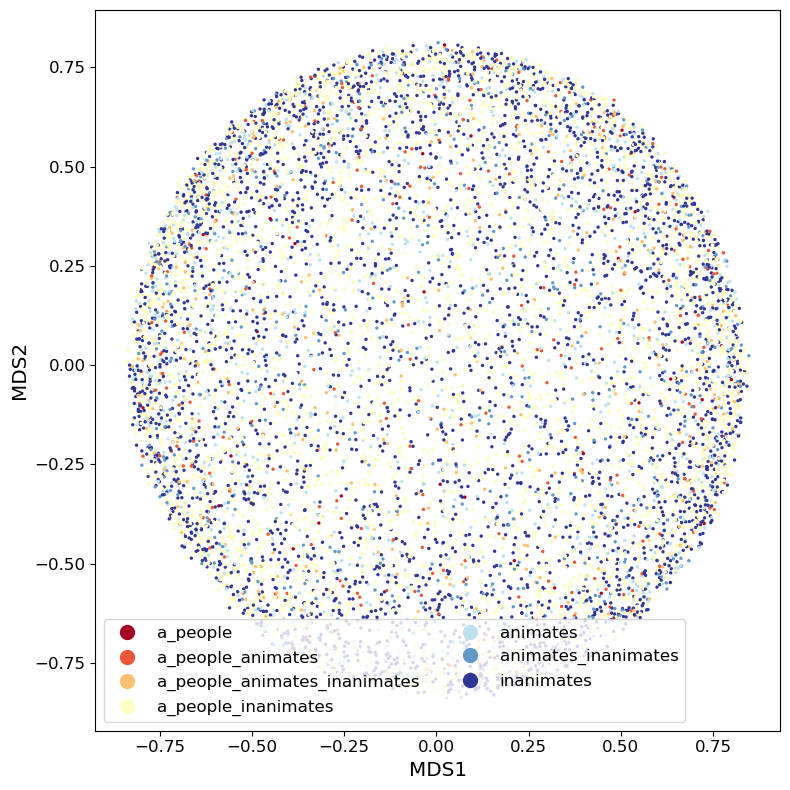

In [48]:
scprep.plot.scatter2d(
        MDS_V1,
        c=class_labels,
        figsize=(8, 8),
        cmap="RdYlBu",
        ticks=True,
        legend_loc='lower left',
        legend_ncol=2,
        label_prefix="MDS"
    )

In [28]:
tsne_operator = manifold.TSNE(
    metric='precomputed',
    perplexity=100,
    n_components=2, 
    init=MDS_V1,
    n_jobs=2
)


In [23]:
#TSNE_V1 = tsne_operator.fit_transform(squareform(RDM))
TSNE_V1 = np.load('TSNE_V1.npy', allow_pickle=True)
TSNE_V1.shape

(9841, 2)

/home/stan/miniconda3/envs/thesis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='MDS1', ylabel='MDS2'>

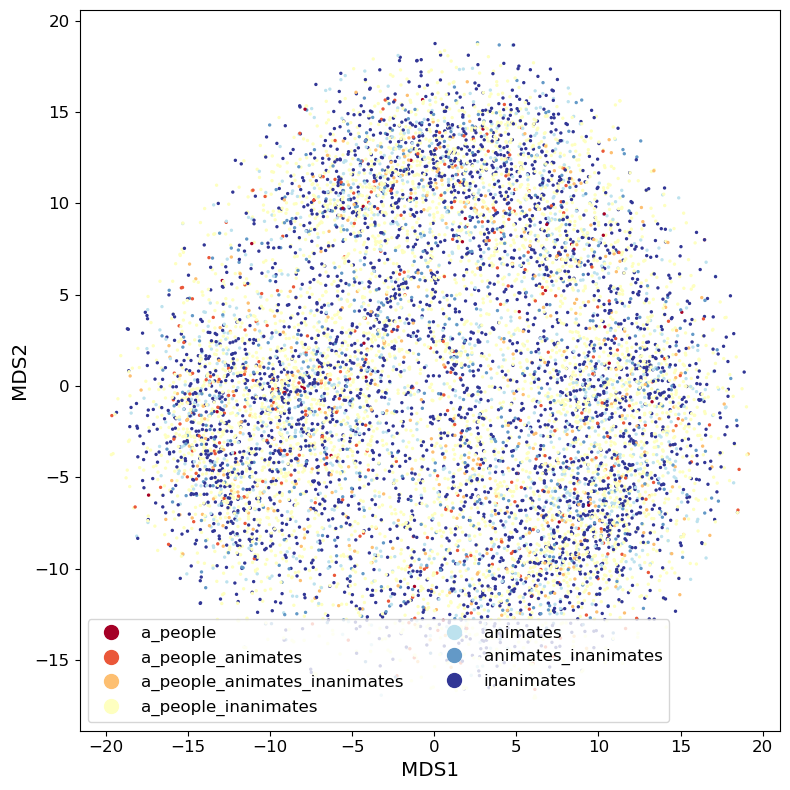

In [24]:
scprep.plot.scatter2d(
        TSNE_V1,
        c=class_labels,
        figsize=(8, 8),
        cmap="RdYlBu",
        ticks=True,
        legend_loc='lower left',
        legend_ncol=2,
        label_prefix="MDS"
    )

In [49]:
RDM_PHC1 = np.load(os.path.join(data_dir, 'RDM' ,'betas_split' , 'subj01_37_PHC-1_fullrdm_correlation_betas_train.npy'), allow_pickle=False)
RDM_PHC1.shape

(48417720,)

In [50]:
MDS_PHC1 = mds(RDM_PHC1, n_jobs=2)
tsne_operator = manifold.TSNE(
    metric='precomputed',
    perplexity=100,
    n_components=2, 
    init=MDS_PHC1,
    n_jobs=2
)
TSNE_PHC1 = tsne_operator.fit_transform(squareform(RDM_PHC1))
np.save('TSNE_PHC1.npy', TSNE_PHC1)


/home/stan/miniconda3/envs/thesis/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


/home/stan/miniconda3/envs/thesis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='MDS1', ylabel='MDS2'>

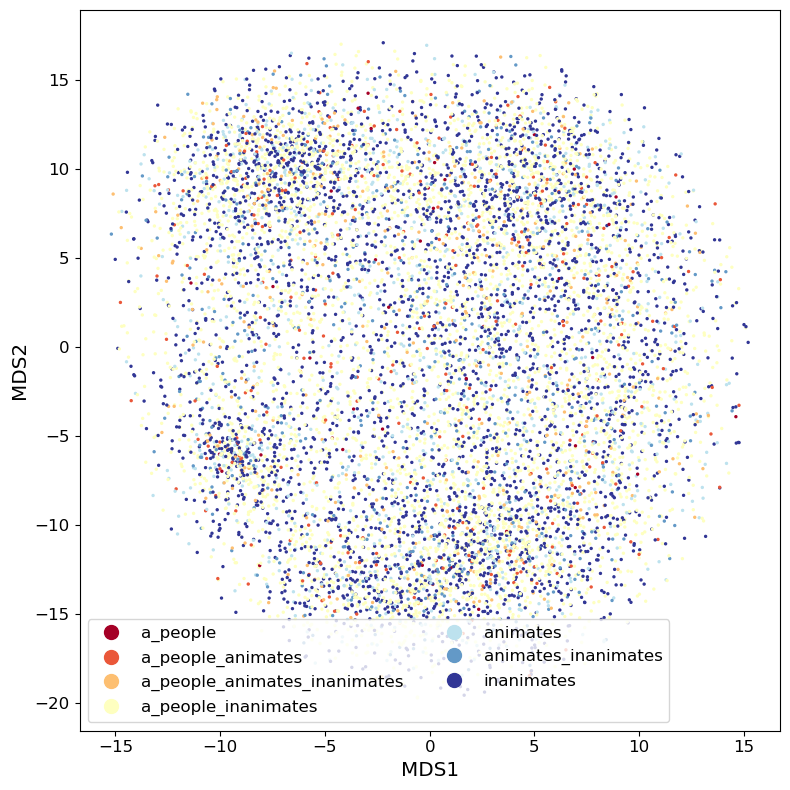

In [51]:
scprep.plot.scatter2d(
        TSNE_PHC1,
        c=class_labels,
        figsize=(8, 8),
        cmap="RdYlBu",
        ticks=True,
        legend_loc='lower left',
        legend_ncol=2,
        label_prefix="MDS"
    )